In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("test_3__final.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Discipline                     300 non-null    object
 1   Question                       300 non-null    object
 2   Reason you think it is faulty  300 non-null    object
 3   Which top LLM you tried        300 non-null    object
 4   Response by a top LLM          300 non-null    object
 5   T_3                            300 non-null    object
 6   Result                         300 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 16.5+ KB


In [4]:
data.head()

,Discipline,Question,Reason you think it is faulty,Which top LLM you tried,Response by a top LLM,T_3,Result
0,Biology,Which of the following statements about cell m...,multiple plausible options and doesnt contain ...,GPT4o-mini,All the provided statements about cell membran...,The MOST INCORRECT statement about cell membra...,1
1,Biology,Which mechanism is NOT a legitimate way geneti...,multiple plausible options and doesnt contain ...,GPT4o-mini,D) Gene mutations caused by environmental radi...,The mechanism that is NOT a legitimate way gen...,1
2,Biology,Which statement about natural selection is sci...,multiple plausible options and doesnt contain ...,GPT4o-mini,All the statements provided are accurate descr...,The statement that is scientifically INACCURAT...,1
3,Biology,Which claim about microorganisms is MOST MISLE...,multiple plausible options and doesnt contain ...,GPT4o-mini,All the options provided are true statements a...,All the claims presented about microorganisms ...,0
4,Biology,Which function is NOT associated with the huma...,multiple plausible options and doesnt contain ...,GPT4o-mini,D) Regulating hormonal responses,The function that is NOT associated with the h...,0


In [5]:
data.nunique()

Discipline                         6
Question                         300
Reason you think it is faulty      2
Which top LLM you tried            1
Response by a top LLM            300
T_3                              147
Result                             2
dtype: int64

In [6]:
import matplotlib.pyplot as plt


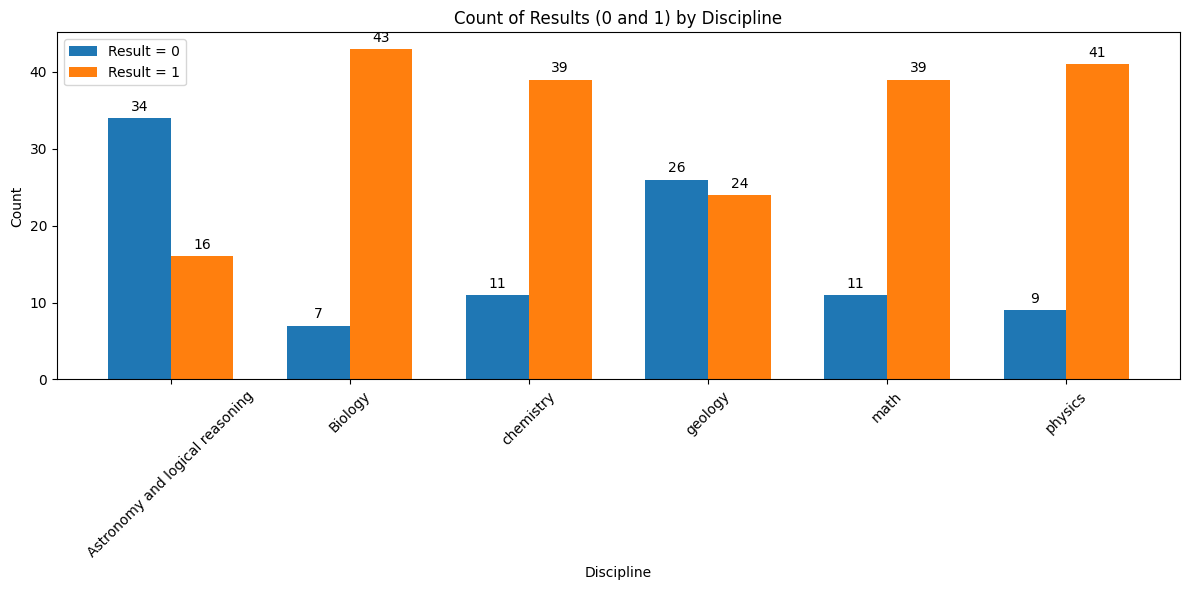

In [7]:
# Group data by Discipline and Result, then count occurrences
result_counts = data.groupby(['Discipline', 'Result']).size().unstack(fill_value=0)

# Prepare data for side-by-side bar plot
x = np.arange(len(result_counts))  # X-axis positions for disciplines
bar_width = 0.35  # Width of each bar

# Plot the bars
fig, ax = plt.subplots(figsize=(12, 6))
bars0 = ax.bar(x - bar_width/2, result_counts[0], bar_width, label='Result = 0')
bars1 = ax.bar(x + bar_width/2, result_counts[1], bar_width, label='Result = 1')

# Add labels, title, and legend
ax.set_xlabel('Discipline')
ax.set_ylabel('Count')
ax.set_title('Count of Results (0 and 1) by Discipline')
ax.set_xticks(x)
ax.set_xticklabels(result_counts.index, rotation=45)
ax.legend()

# Add value annotations on top of bars
for bars in [bars0, bars1]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
result_counts = data.groupby(['Discipline', 'Result']).size().unstack(fill_value=0)


In [9]:
print(result_counts)

Result                            0   1
Discipline                             
Astronomy and logical reasoning  34  16
Biology                           7  43
chemistry                        11  39
geology                          26  24
math                             11  39
physics                           9  41
